# Introduction

Data description and source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass

Excerpt from the data description:

> Mammography is the most effective method for breast cancer screening
> available today. However, the low positive predictive value of breast
> biopsy resulting from mammogram interpretation leads to approximately
> 70% unnecessary biopsies with benign outcomes. To reduce the high
> number of unnecessary breast biopsies, several computer-aided diagnosis
> (CAD) systems have been proposed in the last years.These systems
> help physicians in their decision to perform a breast biopsy on a suspicious
> lesion seen in a mammogram or to perform a short term follow-up
> examination instead.
> This data set can be used to predict the severity (benign or malignant)
> of a mammographic mass lesion from BI-RADS attributes and the patient's age.
> It contains a BI-RADS assessment, the patient's age and three BI-RADS attributes
> together with the ground truth (the severity field) for 516 benign and
> 445 malignant masses that have been identified on full field digital mammograms
> collected at the Institute of Radiology of the
> University Erlangen-Nuremberg between 2003 and 2006.
> Each instance has an associated BI-RADS assessment ranging from 1 (definitely benign)
> to 5 (highly suggestive of malignancy) assigned in a double-review process by
> physicians. Assuming that all cases with BI-RADS assessments greater or equal
> a given value (varying from 1 to 5), are malignant and the other cases benign,
> sensitivities and associated specificities can be calculated. These can be an
> indication of how well a CAD system performs compared to the radiologists.
    
Some background informationon BIRADS:

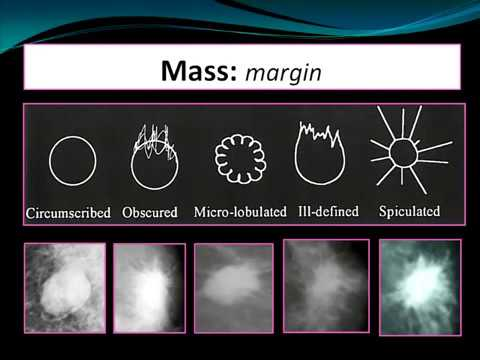

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("zDg_5vmNLaw")

In [2]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pandas.tools.plotting import scatter_matrix
import seaborn

/Users/cynthiasadler/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Import and clean data

I glanced at the data file, and saw that there is no header row, and missing values are denoted with '?'.

In [3]:
names = ['BiRads', 'Age', 'Shape', 'Margin', 'Density', 'Severity']
data = pandas.read_csv('mammographic_masses.data', names=names, na_values=['?'])
data.head()

,BiRads,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,NaN,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,NaN,1


From the data description, we know we have these possible values for the attributes:

1. BI-RADS assessment: 1 to 5 (ordinal)  
2. Age: patient's age in years (integer)
3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
6. Severity: benign=0 or malignant=1 (binominal)

In [4]:
# let's check data integrity of BiRads
data.BiRads.value_counts()

4     547
5     345
3      36
2      14
6      11
0       5
55      1
dtype: int64

In our BiRads data, we know the values are 1 - 5, so we have some abnormal data to clean up.
So, let's exclude the rows that are not 1 - 5.

In [5]:
data = data[(data.BiRads > 0) & (data.BiRads < 6)]
data.BiRads.value_counts()

4    547
5    345
3     36
2     14
dtype: int64

In [6]:
# let's check Shape values are 1 - 4
data.Shape.value_counts()

4    389
1    223
2    209
3     92
dtype: int64

In [7]:
# let's check Margin values are 1 - 5
data.Margin.value_counts()

1    355
4    274
5    133
3    110
2     24
dtype: int64

In [8]:
# check Density values are 1 - 4
data.Density.value_counts()

3    782
2     58
1     15
4     11
dtype: int64

In [9]:
# check Severity values are 0 or 1
data.Severity.value_counts()

0    510
1    432
dtype: int64

# Exploration

Now that we've cleaned up the data, let's explore a bit.

In [10]:
data.describe()

,BiRads,Age,Shape,Margin,Density,Severity
count,942.000000,937.000000,913.000000,896.000000,866.000000,942.000000
mean,4.298301,55.393810,2.708653,2.783482,2.911085,0.458599
std,0.612635,14.498662,1.244506,1.570680,0.375790,0.498548
min,2.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,5.000000,96.000000,4.000000,5.000000,4.000000,1.000000


array([[<matplotlib.axes.AxesSubplot object at 0x11641cd90>,
        <matplotlib.axes.AxesSubplot object at 0x116868f50>]], dtype=object)

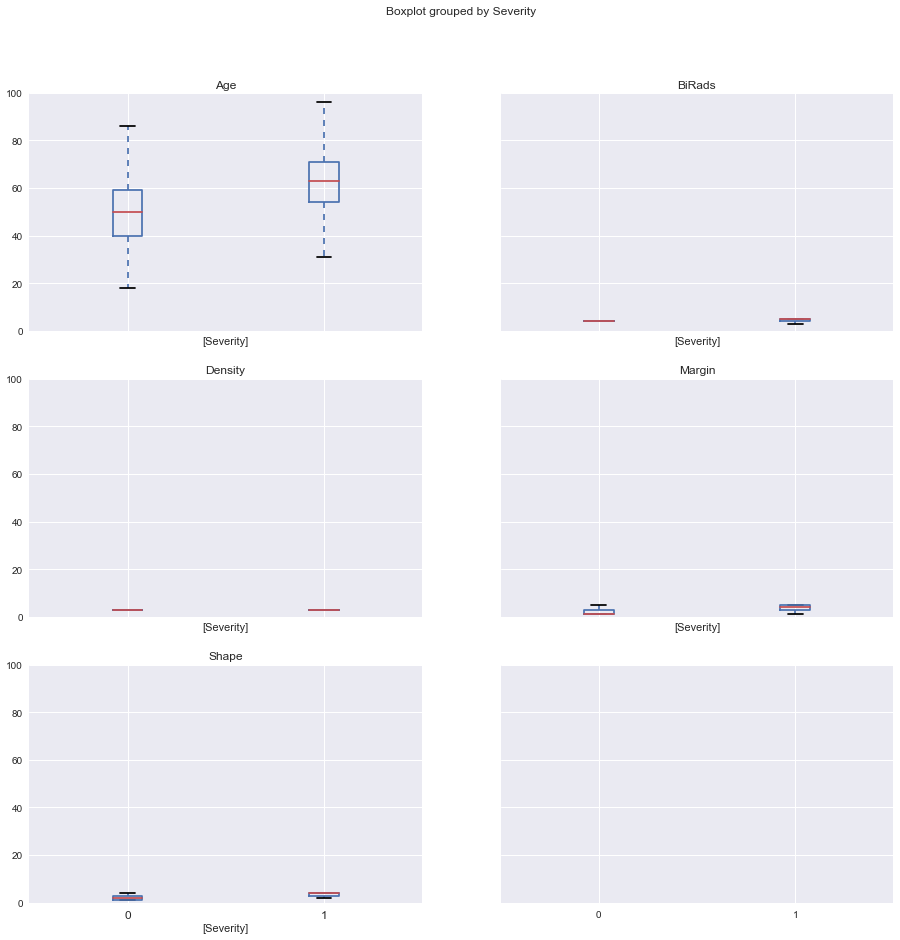

In [11]:
data.boxplot(by='Severity', grid=True, figsize=(15,15))

array([[<matplotlib.axes.AxesSubplot object at 0x116883d90>,
        <matplotlib.axes.AxesSubplot object at 0x117581f10>]], dtype=object)

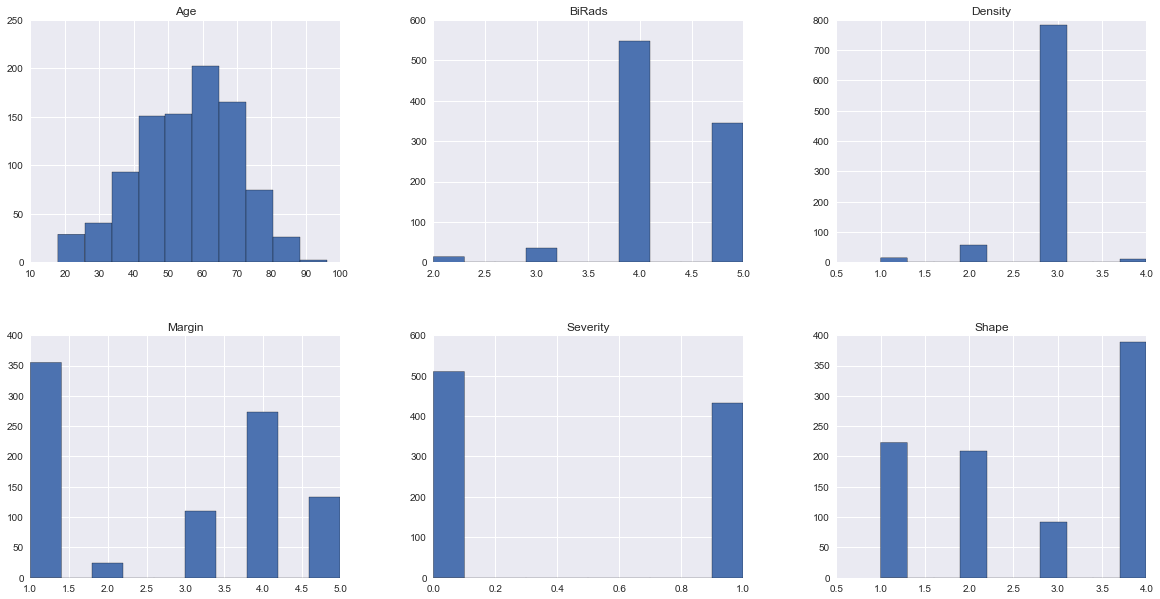

In [12]:
data.hist(figsize=(20,10))

Let's look at histograms segmented by Severity:

Severity
0           [[Axes(0.125,0.563043;0.215278x0.336957), Axes...
1           [[Axes(0.125,0.563043;0.215278x0.336957), Axes...
dtype: object

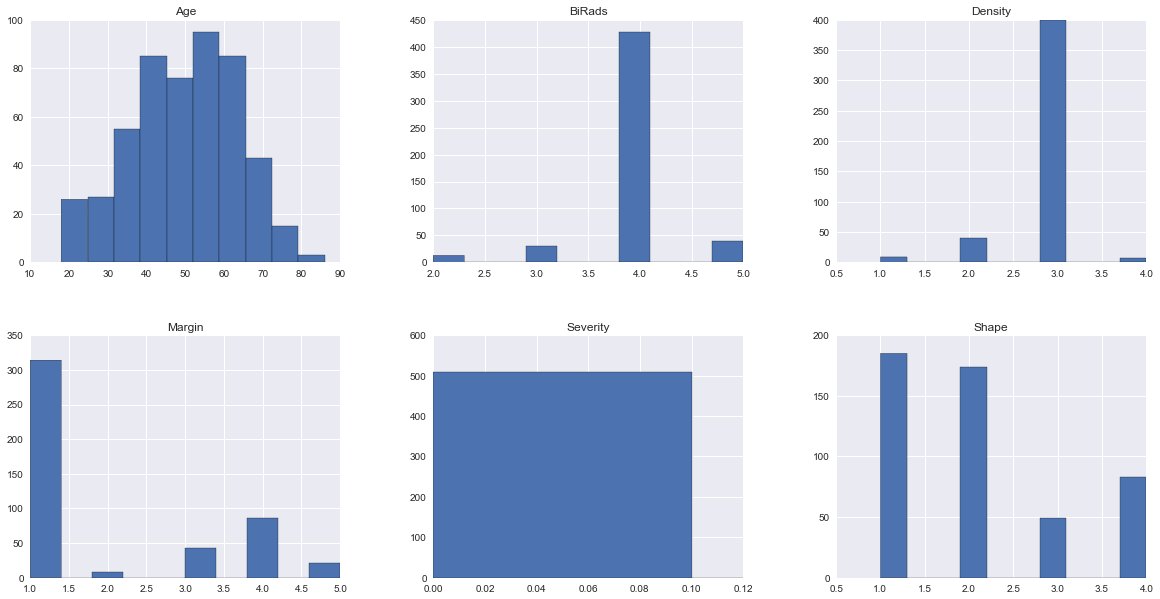

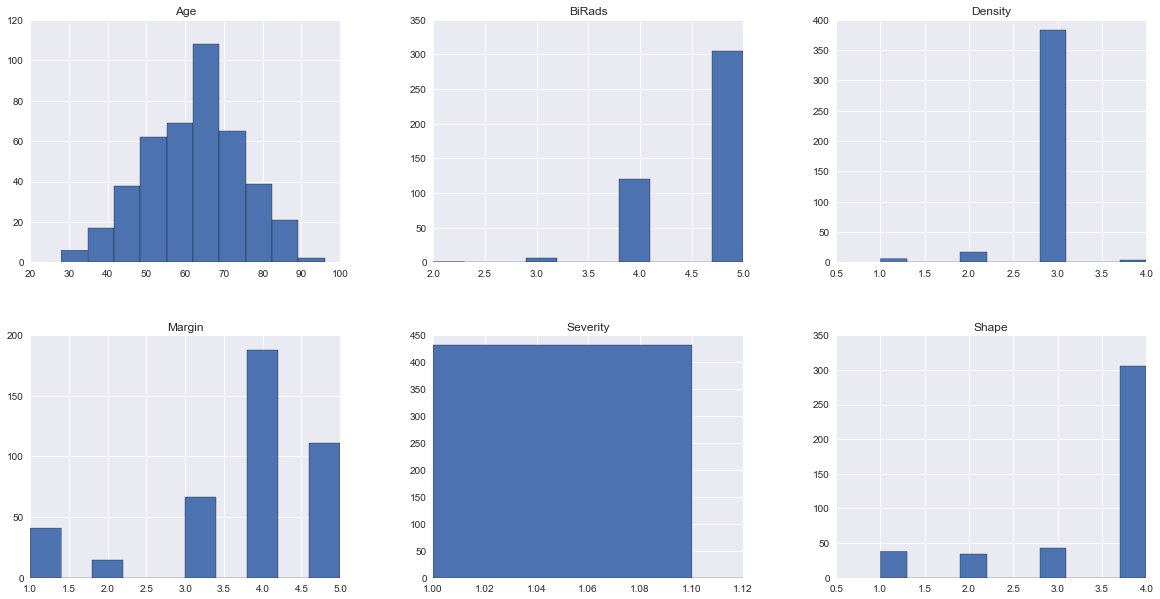

In [13]:
data.groupby('Severity').hist(figsize=(20,10))

It might be easier to see this with overlays:

Severity
0           Axes(0.125,0.125;0.775x0.775)
1           Axes(0.125,0.125;0.775x0.775)
dtype: object

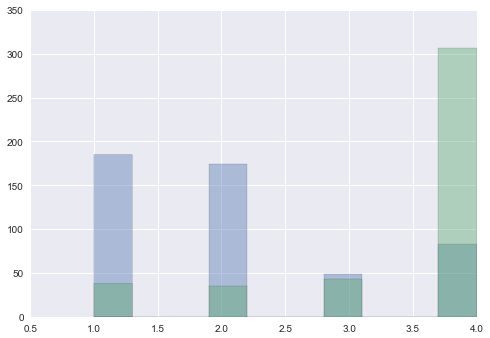

In [14]:
data.groupby('Severity').Shape.hist(alpha=0.4)

Severity
0           Axes(0.125,0.125;0.775x0.775)
1           Axes(0.125,0.125;0.775x0.775)
dtype: object

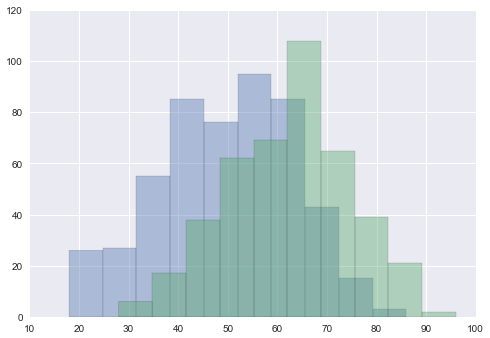

In [15]:
data.groupby('Severity').Age.hist(alpha=0.4)

Severity
0           Axes(0.125,0.125;0.775x0.775)
1           Axes(0.125,0.125;0.775x0.775)
dtype: object

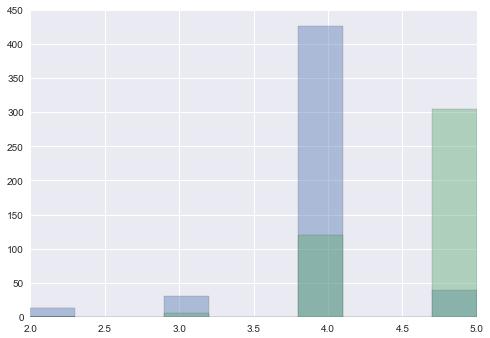

In [16]:
data.groupby('Severity').BiRads.hist(alpha=0.4)

Severity
0           Axes(0.125,0.125;0.775x0.775)
1           Axes(0.125,0.125;0.775x0.775)
dtype: object

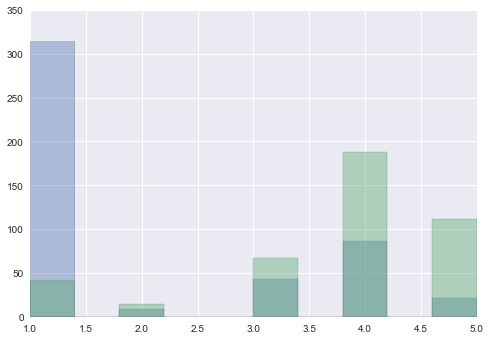

In [17]:
data.groupby('Severity').Margin.hist(alpha=0.4)

Severity
0           Axes(0.125,0.125;0.775x0.775)
1           Axes(0.125,0.125;0.775x0.775)
dtype: object

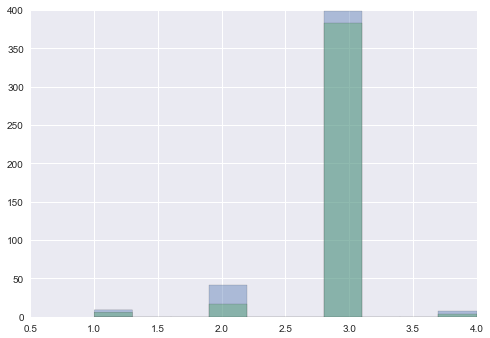

In [18]:
data.groupby('Severity').Density.hist(alpha=0.4)

Another way to detect possible relationships is to look at pearson correlation:

In [22]:
correlation = data.corr()
correlation

,BiRads,Age,Shape,Margin,Density,Severity
BiRads,1.000000,0.347814,0.496042,0.509610,0.098828,0.585002
Age,0.347814,1.000000,0.361598,0.411170,0.032892,0.433852
Shape,0.496042,0.361598,1.000000,0.742494,0.077808,0.561566
Margin,0.509610,0.411170,0.742494,1.000000,0.109155,0.575956
Density,0.098828,0.032892,0.077808,0.109155,1.000000,0.070538
Severity,0.585002,0.433852,0.561566,0.575956,0.070538,1.000000


Looks like Density and Age are not so strongly correlated. We can better visualize with a heatmap:

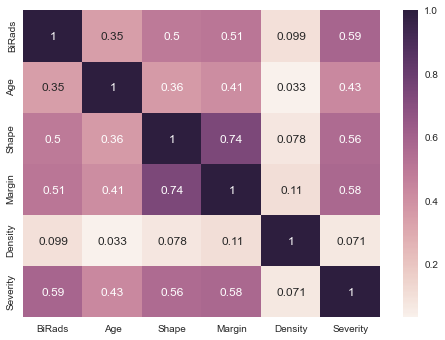

In [24]:
seaborn.heatmap(correlation, annot = True)